2.

In [1]:
import librosa

audio_file = 'BTb-ord-A#1-ff-N-T30d.wav'
y, sr = librosa.load(audio_file)

C:\Users\JIYAO\AppData\Local\Temp\ipykernel_11660\1478895382.py:7: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y), ref=np.max), sr=sr, x_axis='time', y_axis='log')


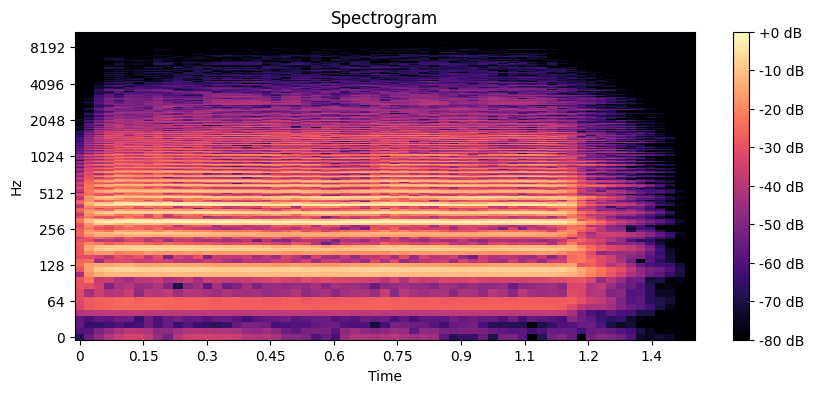

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y), ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

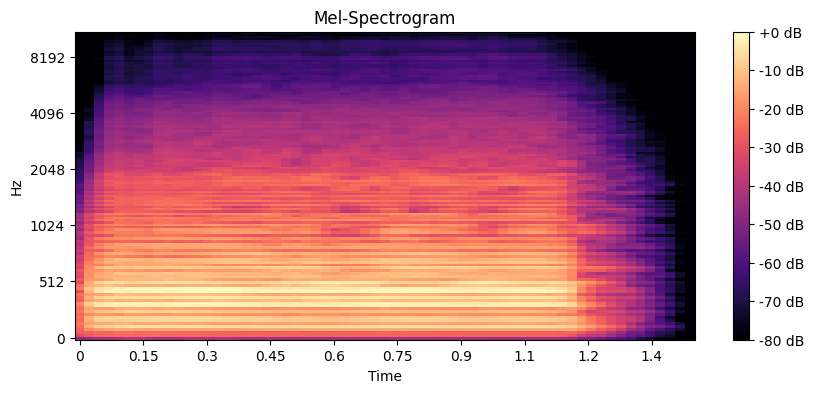

In [3]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()

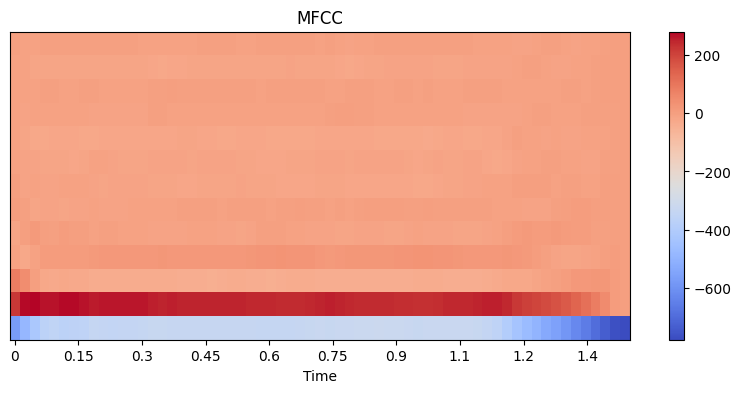

In [4]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

3.

In [5]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def extract_features(file_path, mfcc=True, chroma=True, mel=True):
    with open(file_path, 'rb') as f:
        audio, sr = librosa.load(file_path, sr=None)
        features = []
        mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T, axis=0)
        features.extend(mfccs)
    return features

def load_data(data_path):
    X = []
    y = []
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)
                features = extract_features(file_path)
                X.append(features)
                label = os.path.basename(root) 
                y.append(label)
    return np.array(X), np.array(y)

data_path = 'TinySOL2020'
X, y = load_data(data_path)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (a) SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# (b) Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# (c) MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# (a) SVM model
svm_pred = svm_model.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_pred)
svm_cr = classification_report(y_test, svm_pred)

# (b) Decision Tree model
dt_pred = dt_model.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_pred)
dt_cr = classification_report(y_test, dt_pred)

# (c) MLP model
mlp_pred = mlp_model.predict(X_test)
mlp_cm = confusion_matrix(y_test, mlp_pred)
mlp_cr = classification_report(y_test, mlp_pred)



In [7]:
# Print results
print("SVM Confusion Matrix:")
print(svm_cm)
print("SVM Classification Report:")
print(svm_cr)


SVM Confusion Matrix:
[[ 81   1   0  16]
 [  5 113  15   4]
 [  2  20 212   4]
 [ 10   7  17  76]]
SVM Classification Report:
              precision    recall  f1-score   support

       Brass       0.83      0.83      0.83        98
   Keyboards       0.80      0.82      0.81       137
     Strings       0.87      0.89      0.88       238
       Winds       0.76      0.69      0.72       110

    accuracy                           0.83       583
   macro avg       0.81      0.81      0.81       583
weighted avg       0.83      0.83      0.83       583



In [8]:
print("Decision Tree Confusion Matrix:")
print(dt_cm)
print("Decision Tree Classification Report:")
print(dt_cr)


Decision Tree Confusion Matrix:
[[ 86   0   2  10]
 [  0 125  12   0]
 [  1  13 218   6]
 [  8   8   3  91]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

       Brass       0.91      0.88      0.89        98
   Keyboards       0.86      0.91      0.88       137
     Strings       0.93      0.92      0.92       238
       Winds       0.85      0.83      0.84       110

    accuracy                           0.89       583
   macro avg       0.88      0.88      0.88       583
weighted avg       0.89      0.89      0.89       583



In [9]:

print("MLP Confusion Matrix:")
print(mlp_cm)
print("MLP Classification Report:")
print(mlp_cr)

MLP Confusion Matrix:
[[ 94   0   0   4]
 [  0 133   3   1]
 [  0   1 237   0]
 [  3   2   5 100]]
MLP Classification Report:
              precision    recall  f1-score   support

       Brass       0.97      0.96      0.96        98
   Keyboards       0.98      0.97      0.97       137
     Strings       0.97      1.00      0.98       238
       Winds       0.95      0.91      0.93       110

    accuracy                           0.97       583
   macro avg       0.97      0.96      0.96       583
weighted avg       0.97      0.97      0.97       583



4.

In [37]:
import pandas as pd



# 讀取CSV檔案
df = pd.read_csv("TinySOL_metadata.csv")

for idx,data in df.iterrows():
    display(df.iloc[idx,0].replace("B","1111"))
    
display(df)

# 儲存修改後的資料回CSV檔案
df.to_csv('modified_TinySOL_metadata.csv', index=False)

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F#1-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G1-pp-N-R100u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G#1-pp-N-T16u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A1-pp-N-T23d.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A#1-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-11111-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C2-pp-N-T13d.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C#2-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D2-pp-N-T18u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D#2-pp-N-T11u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-E2-pp-N-T25u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F2-pp-N-T25u_R100u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F#2-pp-N-T14u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G2-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G#2-pp-N-T16u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A2-pp-N-T15u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A#2-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-11112-pp-N-T11d.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C3-pp-N-T11d.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C#3-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D3-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D#3-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-E3-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F3-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F#3-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G3-pp-N-T14d.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G#3-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A3-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A#3-pp-N-T13d.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-11113-pp-N-T14d.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C4-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C#4-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D4-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D#4-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-E4-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F4-pp-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F#1-mf-N-T18u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G1-mf-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G#1-mf-N-T18u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A1-mf-N-T33u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A#1-mf-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-11111-mf-N-T16u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C2-mf-N-T23u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C#2-mf-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D2-mf-N-T15u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D#2-mf-N-T34u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-E2-mf-N-T27u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F2-mf-N-T24u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F#2-mf-N-T19u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G2-mf-N-T15u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G#2-mf-N-T26u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A2-mf-N-T29u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A#2-mf-N-T29u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-11112-mf-N-T17u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C3-mf-N-T28u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C#3-mf-N-T25u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D3-mf-N-T16u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D#3-mf-N-T25u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-E3-mf-N-T23u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F3-mf-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F#3-mf-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G3-mf-N-T14u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G#3-mf-N-T11u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A3-mf-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A#3-mf-N-T14u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-11113-mf-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C4-mf-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C#4-mf-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D4-mf-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D#4-mf-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-E4-mf-N-T11d.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F4-mf-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F#1-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G1-ff-N-T15d.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G#1-ff-N-T12u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A1-ff-N-T19d.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A#1-ff-N-T30d.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-11111-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C2-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C#2-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D2-ff-N-T13u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D#2-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-E2-ff-N-T10u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F2-ff-N-T15u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F#2-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G2-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G#2-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A2-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A#2-ff-N-T19u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-11112-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C3-ff-N-T18u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C#3-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D3-ff-N-T15u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D#3-ff-N-T17u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-E3-ff-N-T16u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F3-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F#3-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G3-ff-N-T14u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-G#3-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A3-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-A#3-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-11113-ff-N-T18d.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C4-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-C#4-ff-N-T21u.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D4-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-D#4-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-E4-ff-N-N.wav'

'1111rass/1111ass_Tuba/ordinario/1111Tb-ord-F4-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A#1-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-11111-pp-N-T15d.wav'

'1111rass/Horn/ordinario/Hn-ord-C2-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C#2-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D2-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D#2-pp-N-R100u.wav'

'1111rass/Horn/ordinario/Hn-ord-E2-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F2-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F#2-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G2-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G#2-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A2-pp-N-R100u.wav'

'1111rass/Horn/ordinario/Hn-ord-A#2-pp-N-R100d.wav'

'1111rass/Horn/ordinario/Hn-ord-11112-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C3-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C#3-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D3-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D#3-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-E3-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F3-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F#3-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G3-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G#3-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A3-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A#3-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-11113-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C4-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C#4-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D4-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D#4-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-E4-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F4-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F#4-pp-N-T10u.wav'

'1111rass/Horn/ordinario/Hn-ord-G4-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G#4-pp-N-T10u.wav'

'1111rass/Horn/ordinario/Hn-ord-A4-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A#4-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-11114-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C5-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C#5-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D5-pp-N-T10u.wav'

'1111rass/Horn/ordinario/Hn-ord-D#5-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-E5-pp-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F5-pp-N-T11u.wav'

'1111rass/Horn/ordinario/Hn-ord-G1-mf-N-T40d.wav'

'1111rass/Horn/ordinario/Hn-ord-G#1-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A1-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A#1-mf-N-T17d.wav'

'1111rass/Horn/ordinario/Hn-ord-11111-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C2-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C#2-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D2-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D#2-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-E2-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F2-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F#2-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G2-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G#2-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A2-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A#2-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-11112-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C3-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C#3-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D3-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D#3-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-E3-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F3-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F#3-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G3-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G#3-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A3-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A#3-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-11113-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C4-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C#4-mf-N-T12u.wav'

'1111rass/Horn/ordinario/Hn-ord-D4-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D#4-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-E4-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F4-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F#4-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G4-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G#4-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A4-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A#4-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-11114-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C5-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C#5-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D5-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D#5-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-E5-mf-N-T13u.wav'

'1111rass/Horn/ordinario/Hn-ord-F5-mf-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-11111-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C2-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C#2-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D2-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D#2-ff-N-T11u.wav'

'1111rass/Horn/ordinario/Hn-ord-E2-ff-N-T18u.wav'

'1111rass/Horn/ordinario/Hn-ord-F2-ff-N-T11u.wav'

'1111rass/Horn/ordinario/Hn-ord-F#2-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G2-ff-N-R100u.wav'

'1111rass/Horn/ordinario/Hn-ord-G#2-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A2-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A#2-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-11112-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C3-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C#3-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D3-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D#3-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-E3-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F3-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F#3-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G3-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G#3-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A3-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A#3-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-11113-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C4-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C#4-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D4-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D#4-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-E4-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F4-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F#4-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G4-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-G#4-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A4-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-A#4-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-11114-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C5-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-C#5-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D5-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-D#5-ff-N-T10u.wav'

'1111rass/Horn/ordinario/Hn-ord-E5-ff-N-N.wav'

'1111rass/Horn/ordinario/Hn-ord-F5-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A#1-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-11111-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C2-pp-N-T23d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C#2-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D2-pp-N-T12d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D#2-pp-N-T14u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-E2-pp-N-T21u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F2-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F#2-pp-N-T20d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G2-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G#2-pp-N-T27u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A2-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A#2-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-11112-pp-N-T19d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C3-pp-N-T25d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C#3-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D3-pp-N-T11u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D#3-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-E3-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F3-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F#3-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G3-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G#3-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A3-pp-N-T14u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A#3-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-11113-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C4-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C#4-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D4-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D#4-pp-N-T13u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-E4-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F4-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F#4-pp-N-T10u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G4-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G#4-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A4-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A#4-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-11114-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C5-pp-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A#1-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-11111-mf-N-T14d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C2-mf-N-T44d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C#2-mf-N-T33d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D2-mf-N-T26d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D#2-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-E2-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F2-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F#2-mf-N-T28d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G2-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G#2-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A2-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A#2-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-11112-mf-N-T26d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C3-mf-N-T18d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C#3-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D3-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D#3-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-E3-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F3-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F#3-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G3-mf-N-T18d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G#3-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A3-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A#3-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-11113-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C4-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C#4-mf-N-T13d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D4-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D#4-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-E4-mf-N-T10u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F4-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F#4-mf-N-T10u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G4-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G#4-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A4-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A#4-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-11114-mf-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C5-mf-N-T23u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A#1-ff-N-T14d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-11111-ff-N-T27d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C2-ff-N-T58d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C#2-ff-N-T21d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D2-ff-N-T37d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D#2-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-E2-ff-N-T12d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F2-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F#2-ff-N-T24d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G2-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G#2-ff-N-T15u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A2-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A#2-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-11112-ff-N-T26d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C3-ff-N-T25d.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C#3-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D3-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D#3-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-E3-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F3-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F#3-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G3-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G#3-ff-N-T10u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A3-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A#3-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-11113-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C4-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C#4-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D4-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-D#4-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-E4-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F4-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-F#4-ff-N-T10u.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G4-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-G#4-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A4-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-A#4-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-11114-ff-N-N.wav'

'1111rass/Trombone/ordinario/Tbn-ord-C5-ff-N-T24u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F#3-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G3-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G#3-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A3-pp-N-T10d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A#3-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-11113-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C4-pp-N-T10d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C#4-pp-N-T11u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D4-pp-N-T18u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D#4-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-E4-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F4-pp-N-T12u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F#4-pp-N-T12u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G4-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G#4-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A4-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A#4-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-11114-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C5-pp-N-T11d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C#5-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D5-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D#5-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-E5-pp-N-T31d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F5-pp-N-T12d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F#5-pp-N-T22d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G5-pp-N-T25d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G#5-pp-N-T23d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A5-pp-N-T26d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A#5-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-11115-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C6-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C#6-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D6-pp-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F#3-mf-N-T23u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G3-mf-N-T12u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G#3-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A3-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A#3-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-11113-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C4-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C#4-mf-N-T17u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D4-mf-N-T13u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D#4-mf-N-T16u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-E4-mf-N-T11u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F4-mf-N-T25u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F#4-mf-N-T16u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G4-mf-N-T15u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G#4-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A4-mf-N-T19u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A#4-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-11114-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C5-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C#5-mf-N-T17u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D5-mf-N-T14u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D#5-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-E5-mf-N-R100u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F5-mf-N-T11d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F#5-mf-N-T10d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G5-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G#5-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A5-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A#5-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-11115-mf-N-T13u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C6-mf-N-T11u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C#6-mf-N-T10u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D6-mf-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G3-ff-N-T21u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G#3-ff-N-T23u_R100d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A3-ff-N-T23u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A#3-ff-N-T23u_R100u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-11113-ff-N-R100d.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C4-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C#4-ff-N-T39u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D4-ff-N-T27u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D#4-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-E4-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F4-ff-N-T17u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F#4-ff-N-T14u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G4-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G#4-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A4-ff-N-T22u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A#4-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-11114-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C5-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C#5-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D5-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-D#5-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-E5-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F5-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-F#5-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G5-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-G#5-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A5-ff-N-T13u.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-A#5-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-11115-ff-N-N.wav'

'1111rass/Trumpet_C/ordinario/TpC-ord-C6-ff-N-T17u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E1-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F1-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#1-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G1-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#1-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A1-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#1-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11111-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C2-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#2-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D2-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#2-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E2-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E2-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F2-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F2-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#2-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#2-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G2-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G2-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#2-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#2-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A2-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A2-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#2-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#2-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11112-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11112-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C3-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C3-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#3-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#3-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D3-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D3-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#3-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#3-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E3-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E3-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E3-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F3-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F3-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#3-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#3-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#3-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G3-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G3-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G3-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#3-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#3-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#3-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A3-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A3-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A3-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#3-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#3-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#3-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11113-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11113-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11113-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C4-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C4-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C4-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#4-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#4-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#4-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D4-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D4-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D4-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#4-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#4-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#4-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E4-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E4-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E4-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F4-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F4-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F4-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#4-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#4-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#4-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G4-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G4-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G4-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#4-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#4-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#4-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A4-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A4-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A4-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#4-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#4-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#4-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11114-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11114-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11114-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C5-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C5-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C5-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#5-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#5-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#5-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D5-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D5-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D5-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#5-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#5-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#5-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E5-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E5-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E5-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F5-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F5-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F5-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#5-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#5-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#5-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G5-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G5-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G5-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#5-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#5-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#5-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A5-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A5-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A5-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#5-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#5-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#5-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11115-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11115-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11115-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C6-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C6-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C6-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#6-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#6-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#6-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D6-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D6-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D6-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#6-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#6-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#6-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E6-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E6-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E6-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F6-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F6-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F6-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#6-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#6-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#6-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G6-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G6-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G6-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#6-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#6-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A6-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A6-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#6-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#6-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11116-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11116-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C7-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C7-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#7-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#7-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D7-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D7-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#7-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#7-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E7-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E7-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F7-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F7-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F7-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#7-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#7-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#7-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G7-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G7-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G7-pp-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#7-pp-N-T11d.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#7-pp-alt1-T10d.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A7-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A7-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#7-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#7-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11117-pp-N-T13d.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11117-pp-alt1-T13d.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C8-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C8-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#8-pp-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#8-pp-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A6-p-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#6-p-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11116-p-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C7-p-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#7-p-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D7-p-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#7-p-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E7-p-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E1-mf-N-T17u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E1-mf-alt1-T13u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F1-mf-N-T19u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F1-mf-alt1-T27u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#1-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#1-mf-alt1-T12u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G1-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G1-mf-alt1-T18u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#1-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#1-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A1-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A1-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#1-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#1-mf-alt1-T12u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11111-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11111-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C2-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C2-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#2-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#2-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D2-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D2-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#2-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#2-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E2-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E2-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E2-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E2-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F2-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F2-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F2-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F2-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#2-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#2-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#2-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#2-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G2-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G2-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G2-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G2-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#2-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#2-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#2-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#2-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A2-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A2-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A2-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A2-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#2-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#2-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#2-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#2-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11112-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11112-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11112-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11112-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C3-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C3-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C3-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C3-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#3-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#3-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#3-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#3-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D3-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D3-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D3-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D3-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#3-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#3-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#3-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#3-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E3-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E3-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E3-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E3-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E3-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E3-mf-alt5-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F3-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F3-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F3-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F3-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F3-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#3-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#3-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#3-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#3-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#3-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G3-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G3-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G3-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G3-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G3-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#3-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#3-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#3-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#3-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#3-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A3-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A3-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A3-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A3-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A3-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#3-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#3-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#3-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#3-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#3-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11113-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11113-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11113-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11113-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11113-mf-alt4-T10d.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C4-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C4-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C4-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C4-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C4-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#4-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#4-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#4-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#4-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#4-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D4-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D4-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D4-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D4-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D4-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#4-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#4-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#4-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#4-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#4-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E4-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E4-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E4-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E4-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E4-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E4-mf-alt5-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F4-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F4-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F4-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F4-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F4-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#4-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#4-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#4-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#4-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#4-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G4-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G4-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G4-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G4-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G4-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#4-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#4-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#4-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#4-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#4-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A4-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A4-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A4-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A4-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A4-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#4-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#4-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#4-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#4-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#4-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11114-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11114-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11114-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11114-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11114-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C5-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C5-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C5-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C5-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C5-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#5-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#5-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#5-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#5-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#5-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D5-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D5-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D5-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D5-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D5-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#5-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#5-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#5-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#5-mf-alt3-T10d.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#5-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E5-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E5-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E5-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E5-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E5-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E5-mf-alt5-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F5-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F5-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F5-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F5-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F5-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#5-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#5-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#5-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#5-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#5-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G5-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G5-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G5-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G5-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G5-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#5-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#5-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#5-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#5-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#5-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A5-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A5-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A5-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A5-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A5-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#5-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#5-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#5-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#5-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#5-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11115-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11115-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11115-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11115-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11115-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C6-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C6-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C6-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C6-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C6-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#6-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#6-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#6-mf-alt2-T10d.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#6-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#6-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D6-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D6-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D6-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D6-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#6-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#6-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#6-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#6-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E6-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E6-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E6-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E6-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E6-mf-alt4-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F6-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F6-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F6-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F6-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#6-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#6-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#6-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#6-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G6-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G6-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G6-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G6-mf-alt3-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#6-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#6-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#6-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A6-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A6-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#6-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#6-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11116-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11116-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C7-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C7-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#7-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#7-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D7-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D7-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#7-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#7-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E7-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E7-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E7-mf-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F7-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F7-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#7-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#7-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G7-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G7-mf-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#7-mf-N-T10d.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A7-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#7-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11117-mf-N-T13d.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C8-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#8-mf-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E1-ff-N-T20u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F1-ff-N-T30u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#1-ff-N-T29u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G1-ff-N-T20u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#1-ff-N-T16u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A1-ff-N-T22u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#1-ff-N-T12u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11111-ff-N-T11u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C2-ff-N-T12u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#2-ff-N-T12u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D2-ff-N-T15u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#2-ff-N-T11u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E2-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E2-ff-alt1-T10u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F2-ff-N-T14u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F2-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#2-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#2-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G2-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G2-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#2-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#2-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A2-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A2-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#2-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#2-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11112-ff-N-T14u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11112-ff-alt1-T13u.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C3-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C3-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#3-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#3-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D3-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D3-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#3-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#3-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E3-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E3-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E3-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F3-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F3-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F3-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#3-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#3-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#3-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G3-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G3-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G3-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#3-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#3-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#3-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A3-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A3-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A3-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#3-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#3-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#3-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11113-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11113-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11113-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C4-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C4-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C4-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#4-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#4-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#4-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D4-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D4-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D4-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#4-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#4-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#4-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E4-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E4-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E4-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F4-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F4-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F4-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#4-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#4-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#4-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G4-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G4-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G4-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#4-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#4-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#4-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A4-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A4-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A4-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#4-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#4-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#4-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11114-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11114-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11114-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C5-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C5-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C5-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#5-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#5-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#5-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D5-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D5-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D5-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#5-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#5-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#5-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E5-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E5-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E5-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F5-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F5-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F5-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#5-ff-N-T10d.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#5-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#5-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G5-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G5-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G5-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#5-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#5-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#5-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A5-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A5-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A5-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#5-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#5-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#5-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11115-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11115-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11115-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C6-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C6-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C6-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#6-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#6-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#6-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D6-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D6-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D6-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#6-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#6-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#6-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E6-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E6-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E6-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F6-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F6-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F6-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#6-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#6-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#6-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G6-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G6-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G6-ff-alt2-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#6-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#6-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A6-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#6-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#6-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11116-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11116-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C7-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C7-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#7-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#7-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D7-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D7-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#7-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-D#7-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E7-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-E7-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F7-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F7-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#7-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-F#7-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G7-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G7-ff-alt1-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-G#7-ff-N-T13d.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A7-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-A#7-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-11117-ff-N-T13d.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C8-ff-N-N.wav'

'Keyboards/Accordion/ordinario/Acc-ord-C#8-ff-N-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C2-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#2-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D2-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#2-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E2-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F2-pp-4c-T19u.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#2-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G2-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G2-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#2-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#2-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A2-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A2-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#2-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#2-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11112-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11112-pp-4c-T16u.wav'

'Strings/Violoncello/ordinario/Vc-ord-C3-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C3-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#3-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#3-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D3-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D3-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D3-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#3-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#3-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#3-pp-4c-T11u.wav'

'Strings/Violoncello/ordinario/Vc-ord-E3-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E3-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E3-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F3-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F3-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F3-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#3-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#3-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#3-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G3-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G3-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G3-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#3-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#3-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#3-pp-4c-T24u.wav'

'Strings/Violoncello/ordinario/Vc-ord-A3-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A3-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A3-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A3-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#3-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#3-pp-2c-T12u.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#3-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#3-pp-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11113-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11113-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11113-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C4-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C4-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C4-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#4-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#4-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#4-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D4-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D4-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D4-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#4-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#4-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#4-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E4-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E4-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E4-pp-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F4-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F4-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F4-pp-3c-T18u.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#4-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#4-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G4-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G4-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#4-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#4-pp-2c-T13u.wav'

'Strings/Violoncello/ordinario/Vc-ord-A4-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A4-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#4-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#4-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11114-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11114-pp-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C5-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C5-pp-2c-T12u.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#5-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D5-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#5-pp-1c-T10d.wav'

'Strings/Violoncello/ordinario/Vc-ord-E5-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F5-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#5-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G5-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#5-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A5-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#5-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11115-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C6-pp-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C2-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#2-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D2-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#2-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E2-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F2-mf-4c-T17u.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#2-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G2-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G2-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#2-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#2-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A2-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A2-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#2-mf-3c-T13u.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#2-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11112-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11112-mf-4c-T20u.wav'

'Strings/Violoncello/ordinario/Vc-ord-C3-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C3-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#3-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#3-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D3-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D3-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D3-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#3-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#3-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#3-mf-4c-T13u.wav'

'Strings/Violoncello/ordinario/Vc-ord-E3-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E3-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E3-mf-4c-T11u.wav'

'Strings/Violoncello/ordinario/Vc-ord-F3-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F3-mf-3c-T11d.wav'

'Strings/Violoncello/ordinario/Vc-ord-F3-mf-4c-T17u.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#3-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#3-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#3-mf-4c-T15u.wav'

'Strings/Violoncello/ordinario/Vc-ord-G3-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G3-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G3-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#3-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#3-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#3-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A3-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A3-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A3-mf-3c-T16d.wav'

'Strings/Violoncello/ordinario/Vc-ord-A3-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#3-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#3-mf-2c-T12u.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#3-mf-3c-T16d_R100u.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#3-mf-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11113-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11113-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11113-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C4-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C4-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C4-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#4-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#4-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#4-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D4-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D4-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D4-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#4-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#4-mf-2c-T12u.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#4-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E4-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E4-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E4-mf-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F4-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F4-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F4-mf-3c-T11u.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#4-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#4-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G4-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G4-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#4-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#4-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A4-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A4-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#4-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#4-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11114-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11114-mf-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C5-mf-1c-T11u.wav'

'Strings/Violoncello/ordinario/Vc-ord-C5-mf-2c-T11u.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#5-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D5-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#5-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E5-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F5-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#5-mf-1c-T12u.wav'

'Strings/Violoncello/ordinario/Vc-ord-G5-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#5-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A5-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#5-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11115-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C6-mf-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C2-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#2-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D2-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#2-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E2-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F2-ff-4c-T17u.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#2-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G2-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G2-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#2-ff-3c-T10d.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#2-ff-4c-T12u.wav'

'Strings/Violoncello/ordinario/Vc-ord-A2-ff-3c-T19d.wav'

'Strings/Violoncello/ordinario/Vc-ord-A2-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#2-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#2-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11112-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11112-ff-4c-T11u.wav'

'Strings/Violoncello/ordinario/Vc-ord-C3-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C3-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#3-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#3-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D3-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D3-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D3-ff-4c-T10d.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#3-ff-2c-T16d.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#3-ff-3c-T12u.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#3-ff-4c-T16u.wav'

'Strings/Violoncello/ordinario/Vc-ord-E3-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E3-ff-3c-T11d.wav'

'Strings/Violoncello/ordinario/Vc-ord-E3-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F3-ff-2c-T17d.wav'

'Strings/Violoncello/ordinario/Vc-ord-F3-ff-3c-T17d.wav'

'Strings/Violoncello/ordinario/Vc-ord-F3-ff-4c-T14u.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#3-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#3-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#3-ff-4c-T14u.wav'

'Strings/Violoncello/ordinario/Vc-ord-G3-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G3-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G3-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#3-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#3-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#3-ff-4c-T15u.wav'

'Strings/Violoncello/ordinario/Vc-ord-A3-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A3-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A3-ff-3c-T21d.wav'

'Strings/Violoncello/ordinario/Vc-ord-A3-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#3-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#3-ff-2c-T12u.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#3-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#3-ff-4c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11113-ff-1c-T11u.wav'

'Strings/Violoncello/ordinario/Vc-ord-11113-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11113-ff-3c-T11u.wav'

'Strings/Violoncello/ordinario/Vc-ord-C4-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C4-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C4-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#4-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#4-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#4-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D4-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D4-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D4-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#4-ff-1c-T22u.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#4-ff-2c-T12u.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#4-ff-3c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E4-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E4-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E4-ff-3c-T10u.wav'

'Strings/Violoncello/ordinario/Vc-ord-F4-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F4-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F4-ff-3c-T14u.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#4-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#4-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G4-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G4-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#4-ff-1c-T18u.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#4-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A4-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A4-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#4-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#4-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11114-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11114-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C5-ff-1c-T16u.wav'

'Strings/Violoncello/ordinario/Vc-ord-C5-ff-2c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C#5-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D5-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-D#5-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-E5-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F5-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-F#5-ff-1c-T33u.wav'

'Strings/Violoncello/ordinario/Vc-ord-G5-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-G#5-ff-1c-T10u.wav'

'Strings/Violoncello/ordinario/Vc-ord-A5-ff-1c-T13d.wav'

'Strings/Violoncello/ordinario/Vc-ord-A#5-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-11115-ff-1c-N.wav'

'Strings/Violoncello/ordinario/Vc-ord-C6-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E1-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F1-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#1-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G1-pp-4c-T10u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#1-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A1-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A1-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#1-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#1-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11111-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11111-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C2-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C2-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#2-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#2-pp-4c-R100u.wav'

'Strings/Contrabass/ordinario/Cb-ord-D2-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D2-pp-3c-T14d.wav'

'Strings/Contrabass/ordinario/Cb-ord-D2-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#2-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#2-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#2-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E2-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E2-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E2-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F2-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F2-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F2-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#2-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#2-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#2-pp-4c-T15u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G2-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G2-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G2-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G2-pp-4c-T13u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#2-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#2-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#2-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#2-pp-4c-T21u.wav'

'Strings/Contrabass/ordinario/Cb-ord-A2-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A2-pp-2c-T12d.wav'

'Strings/Contrabass/ordinario/Cb-ord-A2-pp-3c-T12d.wav'

'Strings/Contrabass/ordinario/Cb-ord-A2-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#2-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#2-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#2-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#2-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11112-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11112-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11112-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11112-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C3-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C3-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C3-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C3-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#3-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#3-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#3-pp-3c-T10u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#3-pp-4c-T16d.wav'

'Strings/Contrabass/ordinario/Cb-ord-D3-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D3-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D3-pp-3c-T27d.wav'

'Strings/Contrabass/ordinario/Cb-ord-D3-pp-4c-T15u.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#3-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#3-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#3-pp-3c-T18d.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#3-pp-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E3-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E3-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E3-pp-3c-T24d.wav'

'Strings/Contrabass/ordinario/Cb-ord-F3-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F3-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F3-pp-3c-T35d.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#3-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#3-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#3-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G3-pp-1c-T11d.wav'

'Strings/Contrabass/ordinario/Cb-ord-G3-pp-2c-T13d.wav'

'Strings/Contrabass/ordinario/Cb-ord-G3-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#3-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#3-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#3-pp-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A3-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A3-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#3-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#3-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11113-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11113-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C4-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C4-pp-2c-T13u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#4-pp-1c-T10u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#4-pp-2c-T10u.wav'

'Strings/Contrabass/ordinario/Cb-ord-D4-pp-1c-T12d.wav'

'Strings/Contrabass/ordinario/Cb-ord-D4-pp-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#4-pp-1c-T10u.wav'

'Strings/Contrabass/ordinario/Cb-ord-E4-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F4-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#4-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G4-pp-1c-T12d.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#4-pp-1c-T22u.wav'

'Strings/Contrabass/ordinario/Cb-ord-A4-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#4-pp-1c-T13u.wav'

'Strings/Contrabass/ordinario/Cb-ord-11114-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C5-pp-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E1-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F1-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#1-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G1-mf-4c-R100u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#1-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A1-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A1-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#1-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#1-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11111-mf-3c-R100u.wav'

'Strings/Contrabass/ordinario/Cb-ord-11111-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C2-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C2-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#2-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#2-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D2-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D2-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D2-mf-4c-T14u.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#2-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#2-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#2-mf-4c-T12u.wav'

'Strings/Contrabass/ordinario/Cb-ord-E2-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E2-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E2-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F2-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F2-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F2-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#2-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#2-mf-3c-T12u.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#2-mf-4c-T10u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G2-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G2-mf-2c-T11d.wav'

'Strings/Contrabass/ordinario/Cb-ord-G2-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G2-mf-4c-T10u_R100u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#2-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#2-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#2-mf-3c-T10u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#2-mf-4c-T12u.wav'

'Strings/Contrabass/ordinario/Cb-ord-A2-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A2-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A2-mf-3c-R100d.wav'

'Strings/Contrabass/ordinario/Cb-ord-A2-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#2-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#2-mf-2c-T13u.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#2-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#2-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11112-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11112-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11112-mf-3c-T10u.wav'

'Strings/Contrabass/ordinario/Cb-ord-11112-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C3-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C3-mf-2c-T12u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C3-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C3-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#3-mf-1c-T11u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#3-mf-2c-T17u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#3-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#3-mf-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D3-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D3-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D3-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D3-mf-4c-T19u.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#3-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#3-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#3-mf-3c-T24d.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#3-mf-4c-T11u.wav'

'Strings/Contrabass/ordinario/Cb-ord-E3-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E3-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E3-mf-3c-T14d.wav'

'Strings/Contrabass/ordinario/Cb-ord-F3-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F3-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F3-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#3-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#3-mf-2c-T14u.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#3-mf-3c-T15u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G3-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G3-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G3-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#3-mf-1c-T13u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#3-mf-2c-T12u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#3-mf-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A3-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A3-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#3-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#3-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11113-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11113-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C4-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C4-mf-2c-T13u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#4-mf-1c-T29u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#4-mf-2c-T12u.wav'

'Strings/Contrabass/ordinario/Cb-ord-D4-mf-1c-T13d.wav'

'Strings/Contrabass/ordinario/Cb-ord-D4-mf-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#4-mf-1c-T18u.wav'

'Strings/Contrabass/ordinario/Cb-ord-E4-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F4-mf-1c-T16u.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#4-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G4-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#4-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A4-mf-1c-T10u.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#4-mf-1c-T20u.wav'

'Strings/Contrabass/ordinario/Cb-ord-11114-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C5-mf-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E1-ff-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F1-ff-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#1-ff-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G1-ff-4c-T12u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#1-ff-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A1-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A1-ff-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#1-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#1-ff-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11111-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11111-ff-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C2-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C2-ff-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#2-ff-3c-T11u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#2-ff-4c-T27u.wav'

'Strings/Contrabass/ordinario/Cb-ord-D2-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D2-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D2-ff-4c-T24u.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#2-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#2-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#2-ff-4c-T16u.wav'

'Strings/Contrabass/ordinario/Cb-ord-E2-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E2-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-E2-ff-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F2-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F2-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F2-ff-4c-T12u.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#2-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#2-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#2-ff-4c-T31u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G2-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G2-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G2-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G2-ff-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#2-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#2-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#2-ff-3c-T30u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#2-ff-4c-T28u.wav'

'Strings/Contrabass/ordinario/Cb-ord-A2-ff-1c-R100d.wav'

'Strings/Contrabass/ordinario/Cb-ord-A2-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A2-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A2-ff-4c-T17u.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#2-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#2-ff-2c-T14u.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#2-ff-3c-T13u.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#2-ff-4c-T21u.wav'

'Strings/Contrabass/ordinario/Cb-ord-11112-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11112-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11112-ff-3c-T17u.wav'

'Strings/Contrabass/ordinario/Cb-ord-11112-ff-4c-T25u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C3-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C3-ff-2c-T13u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C3-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C3-ff-4c-T14u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#3-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#3-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#3-ff-3c-T20u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#3-ff-4c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D3-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D3-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D3-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D3-ff-4c-T31u.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#3-ff-1c-T11u.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#3-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#3-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#3-ff-4c-T31u.wav'

'Strings/Contrabass/ordinario/Cb-ord-E3-ff-1c-T12u.wav'

'Strings/Contrabass/ordinario/Cb-ord-E3-ff-2c-T16u.wav'

'Strings/Contrabass/ordinario/Cb-ord-E3-ff-3c-T17d.wav'

'Strings/Contrabass/ordinario/Cb-ord-F3-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F3-ff-2c-T12u.wav'

'Strings/Contrabass/ordinario/Cb-ord-F3-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#3-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#3-ff-2c-T19u.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#3-ff-3c-T10u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G3-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G3-ff-2c-T22u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G3-ff-3c-T16u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#3-ff-1c-T11u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#3-ff-2c-T13u.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#3-ff-3c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A3-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A3-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#3-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#3-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11113-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11113-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C4-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-C4-ff-2c-T20u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#4-ff-1c-T22u.wav'

'Strings/Contrabass/ordinario/Cb-ord-C#4-ff-2c-T13u.wav'

'Strings/Contrabass/ordinario/Cb-ord-D4-ff-1c-T17d.wav'

'Strings/Contrabass/ordinario/Cb-ord-D4-ff-2c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-D#4-ff-1c-T20u.wav'

'Strings/Contrabass/ordinario/Cb-ord-E4-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F4-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-F#4-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G4-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-G#4-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A4-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-A#4-ff-1c-N.wav'

'Strings/Contrabass/ordinario/Cb-ord-11114-ff-1c-T15d.wav'

'Strings/Contrabass/ordinario/Cb-ord-C5-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-C3-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#3-pp-4c-T22u.wav'

'Strings/Viola/ordinario/Va-ord-D3-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#3-pp-4c-T17u.wav'

'Strings/Viola/ordinario/Va-ord-E3-pp-4c-T17u.wav'

'Strings/Viola/ordinario/Va-ord-F3-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#3-pp-4c-T11u.wav'

'Strings/Viola/ordinario/Va-ord-G3-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G3-pp-4c-T19u.wav'

'Strings/Viola/ordinario/Va-ord-G#3-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#3-pp-4c-T18u.wav'

'Strings/Viola/ordinario/Va-ord-A3-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-A3-pp-4c-T14u.wav'

'Strings/Viola/ordinario/Va-ord-A#3-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#3-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-11113-pp-3c-T12u.wav'

'Strings/Viola/ordinario/Va-ord-11113-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-C4-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-C4-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#4-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#4-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-D4-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D4-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-D4-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#4-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#4-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#4-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-E4-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-E4-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-E4-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-F4-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-F4-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-F4-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#4-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#4-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#4-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-G4-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-G4-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G4-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#4-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#4-pp-3c-T10d.wav'

'Strings/Viola/ordinario/Va-ord-G#4-pp-4c-T10u.wav'

'Strings/Viola/ordinario/Va-ord-A4-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A4-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-A4-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-A4-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#4-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#4-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#4-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#4-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-11114-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-11114-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-11114-pp-3c-T11d.wav'

'Strings/Viola/ordinario/Va-ord-11114-pp-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-C5-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-C5-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-C5-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-C5-pp-4c-T20u.wav'

'Strings/Viola/ordinario/Va-ord-C#5-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#5-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#5-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-D5-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-D5-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D5-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#5-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#5-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#5-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-E5-pp-1c-T18u.wav'

'Strings/Viola/ordinario/Va-ord-E5-pp-2c-T11u.wav'

'Strings/Viola/ordinario/Va-ord-E5-pp-3c-T13u.wav'

'Strings/Viola/ordinario/Va-ord-F5-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-F5-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-F5-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#5-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#5-pp-2c-R100u.wav'

'Strings/Viola/ordinario/Va-ord-F#5-pp-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G5-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-G5-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-G5-pp-3c-T15u.wav'

'Strings/Viola/ordinario/Va-ord-G#5-pp-1c-T13u.wav'

'Strings/Viola/ordinario/Va-ord-G#5-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-A5-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A5-pp-2c-T11u.wav'

'Strings/Viola/ordinario/Va-ord-A#5-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#5-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-11115-pp-1c-T14u.wav'

'Strings/Viola/ordinario/Va-ord-11115-pp-2c-T20u.wav'

'Strings/Viola/ordinario/Va-ord-C6-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-C6-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#6-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#6-pp-2c-T11u.wav'

'Strings/Viola/ordinario/Va-ord-D6-pp-1c-T11u.wav'

'Strings/Viola/ordinario/Va-ord-D6-pp-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#6-pp-1c-T12u.wav'

'Strings/Viola/ordinario/Va-ord-E6-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-F6-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#6-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-G6-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#6-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A6-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#6-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-11116-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-C7-pp-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-C3-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#3-mf-4c-T24u.wav'

'Strings/Viola/ordinario/Va-ord-D3-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#3-mf-4c-T22u.wav'

'Strings/Viola/ordinario/Va-ord-E3-mf-4c-T19u.wav'

'Strings/Viola/ordinario/Va-ord-F3-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#3-mf-4c-T12u.wav'

'Strings/Viola/ordinario/Va-ord-G3-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G3-mf-4c-T21u.wav'

'Strings/Viola/ordinario/Va-ord-G#3-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#3-mf-4c-T23u.wav'

'Strings/Viola/ordinario/Va-ord-A3-mf-3c-R100d.wav'

'Strings/Viola/ordinario/Va-ord-A3-mf-4c-T10u.wav'

'Strings/Viola/ordinario/Va-ord-A#3-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#3-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-11113-mf-3c-T16u.wav'

'Strings/Viola/ordinario/Va-ord-11113-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-C4-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-C4-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#4-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#4-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-D4-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D4-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-D4-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#4-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#4-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#4-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-E4-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-E4-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-E4-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-F4-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-F4-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-F4-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#4-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#4-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#4-mf-4c-T26u.wav'

'Strings/Viola/ordinario/Va-ord-G4-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-G4-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G4-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#4-mf-2c-T10d.wav'

'Strings/Viola/ordinario/Va-ord-G#4-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#4-mf-4c-T11u.wav'

'Strings/Viola/ordinario/Va-ord-A4-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A4-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-A4-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-A4-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#4-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#4-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#4-mf-3c-T11d.wav'

'Strings/Viola/ordinario/Va-ord-A#4-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-11114-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-11114-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-11114-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-11114-mf-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-C5-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-C5-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-C5-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-C5-mf-4c-T21u.wav'

'Strings/Viola/ordinario/Va-ord-C#5-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#5-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#5-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-D5-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-D5-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D5-mf-3c-T10d.wav'

'Strings/Viola/ordinario/Va-ord-D#5-mf-1c-T11u.wav'

'Strings/Viola/ordinario/Va-ord-D#5-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#5-mf-3c-T11u.wav'

'Strings/Viola/ordinario/Va-ord-E5-mf-1c-T16u.wav'

'Strings/Viola/ordinario/Va-ord-E5-mf-2c-T11u.wav'

'Strings/Viola/ordinario/Va-ord-E5-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-F5-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-F5-mf-2c-T12u.wav'

'Strings/Viola/ordinario/Va-ord-F5-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#5-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#5-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#5-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G5-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-G5-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-G5-mf-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#5-mf-1c-T13u.wav'

'Strings/Viola/ordinario/Va-ord-G#5-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-A5-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A5-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#5-mf-1c-T16u.wav'

'Strings/Viola/ordinario/Va-ord-A#5-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-11115-mf-1c-T15u.wav'

'Strings/Viola/ordinario/Va-ord-11115-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-C6-mf-1c-T12u.wav'

'Strings/Viola/ordinario/Va-ord-C6-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#6-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#6-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D6-mf-1c-T15u.wav'

'Strings/Viola/ordinario/Va-ord-D6-mf-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#6-mf-1c-T13u.wav'

'Strings/Viola/ordinario/Va-ord-E6-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-F6-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#6-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-G6-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#6-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A6-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#6-mf-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-11116-mf-1c-T17u.wav'

'Strings/Viola/ordinario/Va-ord-C7-mf-1c-T10u.wav'

'Strings/Viola/ordinario/Va-ord-C3-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#3-ff-4c-T26u.wav'

'Strings/Viola/ordinario/Va-ord-D3-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#3-ff-4c-T20u.wav'

'Strings/Viola/ordinario/Va-ord-E3-ff-4c-T23u.wav'

'Strings/Viola/ordinario/Va-ord-F3-ff-4c-T23u_R100u.wav'

'Strings/Viola/ordinario/Va-ord-F#3-ff-4c-T17u.wav'

'Strings/Viola/ordinario/Va-ord-G3-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G3-ff-4c-T22u.wav'

'Strings/Viola/ordinario/Va-ord-G#3-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#3-ff-4c-T24u.wav'

'Strings/Viola/ordinario/Va-ord-A3-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-A3-ff-4c-T16u.wav'

'Strings/Viola/ordinario/Va-ord-A#3-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#3-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-11113-ff-3c-T18u.wav'

'Strings/Viola/ordinario/Va-ord-11113-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-C4-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-C4-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#4-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#4-ff-4c-T10u.wav'

'Strings/Viola/ordinario/Va-ord-D4-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D4-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-D4-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#4-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#4-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#4-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-E4-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-E4-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-E4-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-F4-ff-2c-T10u.wav'

'Strings/Viola/ordinario/Va-ord-F4-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-F4-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#4-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#4-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#4-ff-4c-T29u.wav'

'Strings/Viola/ordinario/Va-ord-G4-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-G4-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G4-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#4-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#4-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#4-ff-4c-T10u.wav'

'Strings/Viola/ordinario/Va-ord-A4-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A4-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-A4-ff-3c-R100d.wav'

'Strings/Viola/ordinario/Va-ord-A4-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#4-ff-1c-T12u.wav'

'Strings/Viola/ordinario/Va-ord-A#4-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#4-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#4-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-11114-ff-1c-T10u.wav'

'Strings/Viola/ordinario/Va-ord-11114-ff-2c-T11u.wav'

'Strings/Viola/ordinario/Va-ord-11114-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-11114-ff-4c-N.wav'

'Strings/Viola/ordinario/Va-ord-C5-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-C5-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-C5-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-C5-ff-4c-T17u.wav'

'Strings/Viola/ordinario/Va-ord-C#5-ff-1c-R100u.wav'

'Strings/Viola/ordinario/Va-ord-C#5-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#5-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-D5-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-D5-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D5-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#5-ff-1c-T12u.wav'

'Strings/Viola/ordinario/Va-ord-D#5-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#5-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-E5-ff-1c-T13u.wav'

'Strings/Viola/ordinario/Va-ord-E5-ff-2c-T16u.wav'

'Strings/Viola/ordinario/Va-ord-E5-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-F5-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-F5-ff-2c-T11u.wav'

'Strings/Viola/ordinario/Va-ord-F5-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#5-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#5-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#5-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G5-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-G5-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-G5-ff-3c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#5-ff-1c-T15u.wav'

'Strings/Viola/ordinario/Va-ord-G#5-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-A5-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A5-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-A#5-ff-1c-T15u.wav'

'Strings/Viola/ordinario/Va-ord-A#5-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-11115-ff-1c-T18u.wav'

'Strings/Viola/ordinario/Va-ord-11115-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-C6-ff-1c-T17u.wav'

'Strings/Viola/ordinario/Va-ord-C6-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-C#6-ff-1c-T10u.wav'

'Strings/Viola/ordinario/Va-ord-C#6-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D6-ff-1c-T18u.wav'

'Strings/Viola/ordinario/Va-ord-D6-ff-2c-N.wav'

'Strings/Viola/ordinario/Va-ord-D#6-ff-1c-T14u.wav'

'Strings/Viola/ordinario/Va-ord-E6-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-F6-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-F#6-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-G6-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-G#6-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-A6-ff-1c-T11u.wav'

'Strings/Viola/ordinario/Va-ord-A#6-ff-1c-N.wav'

'Strings/Viola/ordinario/Va-ord-11116-ff-1c-T13u.wav'

'Strings/Viola/ordinario/Va-ord-C7-ff-1c-T16u.wav'

'Strings/Violin/ordinario/Vn-ord-G3-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#3-pp-4c-T15u.wav'

'Strings/Violin/ordinario/Vn-ord-A3-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#3-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11113-pp-4c-T10u.wav'

'Strings/Violin/ordinario/Vn-ord-C4-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#4-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D4-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D4-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#4-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#4-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E4-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E4-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F4-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F4-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#4-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#4-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G4-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G4-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#4-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#4-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A4-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A4-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A4-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#4-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#4-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#4-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11114-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11114-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11114-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C5-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C5-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C5-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#5-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#5-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#5-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D5-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D5-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D5-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#5-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#5-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#5-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E5-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E5-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E5-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E5-pp-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F5-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F5-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F5-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#5-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#5-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#5-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G5-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G5-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G5-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#5-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#5-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#5-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A5-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A5-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A5-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#5-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#5-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#5-pp-3c-T10u.wav'

'Strings/Violin/ordinario/Vn-ord-11115-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11115-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11115-pp-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C6-pp-1c-T11d.wav'

'Strings/Violin/ordinario/Vn-ord-C6-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C6-pp-3c-T14d.wav'

'Strings/Violin/ordinario/Vn-ord-C#6-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#6-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D6-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D6-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#6-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#6-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E6-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E6-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F6-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F6-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#6-pp-1c-T12d.wav'

'Strings/Violin/ordinario/Vn-ord-F#6-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G6-pp-1c-T12d.wav'

'Strings/Violin/ordinario/Vn-ord-G6-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#6-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#6-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A6-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A6-pp-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#6-pp-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11116-pp-1c-T12d.wav'

'Strings/Violin/ordinario/Vn-ord-C7-pp-1c-T28d.wav'

'Strings/Violin/ordinario/Vn-ord-C#7-pp-1c-T15d.wav'

'Strings/Violin/ordinario/Vn-ord-D7-pp-1c-T17d.wav'

'Strings/Violin/ordinario/Vn-ord-D#7-pp-1c-T16d.wav'

'Strings/Violin/ordinario/Vn-ord-E7-pp-1c-T21d.wav'

'Strings/Violin/ordinario/Vn-ord-G3-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#3-mf-4c-T13u.wav'

'Strings/Violin/ordinario/Vn-ord-A3-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#3-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11113-mf-4c-T15u.wav'

'Strings/Violin/ordinario/Vn-ord-C4-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#4-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D4-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D4-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#4-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#4-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E4-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E4-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F4-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F4-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#4-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#4-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G4-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G4-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#4-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#4-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A4-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A4-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A4-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#4-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#4-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#4-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11114-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11114-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11114-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C5-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C5-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C5-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#5-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#5-mf-3c-T11u.wav'

'Strings/Violin/ordinario/Vn-ord-C#5-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D5-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D5-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D5-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#5-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#5-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#5-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E5-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E5-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E5-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E5-mf-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F5-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F5-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F5-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#5-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#5-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#5-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G5-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G5-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G5-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#5-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#5-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#5-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A5-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A5-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A5-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#5-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#5-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#5-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11115-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11115-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11115-mf-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C6-mf-1c-T12d.wav'

'Strings/Violin/ordinario/Vn-ord-C6-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C6-mf-3c-T13d.wav'

'Strings/Violin/ordinario/Vn-ord-C#6-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#6-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D6-mf-1c-T12d.wav'

'Strings/Violin/ordinario/Vn-ord-D6-mf-2c-T12d.wav'

'Strings/Violin/ordinario/Vn-ord-D#6-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#6-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E6-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E6-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F6-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F6-mf-2c-T17d.wav'

'Strings/Violin/ordinario/Vn-ord-F#6-mf-1c-T10d.wav'

'Strings/Violin/ordinario/Vn-ord-F#6-mf-2c-T11d.wav'

'Strings/Violin/ordinario/Vn-ord-G6-mf-1c-T15d.wav'

'Strings/Violin/ordinario/Vn-ord-G6-mf-2c-T12d.wav'

'Strings/Violin/ordinario/Vn-ord-G#6-mf-1c-T11d_R100d.wav'

'Strings/Violin/ordinario/Vn-ord-G#6-mf-2c-T21d.wav'

'Strings/Violin/ordinario/Vn-ord-A6-mf-1c-T11d.wav'

'Strings/Violin/ordinario/Vn-ord-A6-mf-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#6-mf-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11116-mf-1c-T15d.wav'

'Strings/Violin/ordinario/Vn-ord-C7-mf-1c-T27d.wav'

'Strings/Violin/ordinario/Vn-ord-C#7-mf-1c-T22d.wav'

'Strings/Violin/ordinario/Vn-ord-D7-mf-1c-T22d.wav'

'Strings/Violin/ordinario/Vn-ord-D#7-mf-1c-T22d_R100u.wav'

'Strings/Violin/ordinario/Vn-ord-E7-mf-1c-T22d.wav'

'Strings/Violin/ordinario/Vn-ord-G3-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#3-ff-4c-T16u.wav'

'Strings/Violin/ordinario/Vn-ord-A3-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#3-ff-4c-T15u.wav'

'Strings/Violin/ordinario/Vn-ord-11113-ff-4c-T17u.wav'

'Strings/Violin/ordinario/Vn-ord-C4-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#4-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D4-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D4-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#4-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#4-ff-4c-T10u.wav'

'Strings/Violin/ordinario/Vn-ord-E4-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E4-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F4-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F4-ff-4c-T11u.wav'

'Strings/Violin/ordinario/Vn-ord-F#4-ff-3c-T10u.wav'

'Strings/Violin/ordinario/Vn-ord-F#4-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G4-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G4-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#4-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#4-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A4-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A4-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A4-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#4-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#4-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#4-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11114-ff-2c-T10u.wav'

'Strings/Violin/ordinario/Vn-ord-11114-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11114-ff-4c-T12u.wav'

'Strings/Violin/ordinario/Vn-ord-C5-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C5-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C5-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#5-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#5-ff-3c-T13u.wav'

'Strings/Violin/ordinario/Vn-ord-C#5-ff-4c-T10u.wav'

'Strings/Violin/ordinario/Vn-ord-D5-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D5-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D5-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#5-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#5-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#5-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E5-ff-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E5-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E5-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E5-ff-4c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F5-ff-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F5-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F5-ff-3c-T15u.wav'

'Strings/Violin/ordinario/Vn-ord-F#5-ff-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#5-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F#5-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G5-ff-1c-T11d.wav'

'Strings/Violin/ordinario/Vn-ord-G5-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G5-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#5-ff-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#5-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-G#5-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A5-ff-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A5-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A5-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-A#5-ff-1c-T13u.wav'

'Strings/Violin/ordinario/Vn-ord-A#5-ff-2c-T10u.wav'

'Strings/Violin/ordinario/Vn-ord-A#5-ff-3c-R100u.wav'

'Strings/Violin/ordinario/Vn-ord-11115-ff-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11115-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11115-ff-3c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C6-ff-1c-T11d.wav'

'Strings/Violin/ordinario/Vn-ord-C6-ff-2c-T11d.wav'

'Strings/Violin/ordinario/Vn-ord-C6-ff-3c-T18d.wav'

'Strings/Violin/ordinario/Vn-ord-C#6-ff-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-C#6-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D6-ff-1c-T11d.wav'

'Strings/Violin/ordinario/Vn-ord-D6-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#6-ff-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-D#6-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E6-ff-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-E6-ff-2c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F6-ff-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-F6-ff-2c-T20d.wav'

'Strings/Violin/ordinario/Vn-ord-F#6-ff-1c-T12d.wav'

'Strings/Violin/ordinario/Vn-ord-F#6-ff-2c-T16d.wav'

'Strings/Violin/ordinario/Vn-ord-G6-ff-1c-T12d_R100u.wav'

'Strings/Violin/ordinario/Vn-ord-G6-ff-2c-T12d.wav'

'Strings/Violin/ordinario/Vn-ord-G#6-ff-1c-T24d.wav'

'Strings/Violin/ordinario/Vn-ord-G#6-ff-2c-T14d.wav'

'Strings/Violin/ordinario/Vn-ord-A6-ff-1c-T11d.wav'

'Strings/Violin/ordinario/Vn-ord-A#6-ff-1c-N.wav'

'Strings/Violin/ordinario/Vn-ord-11116-ff-1c-T20d.wav'

'Strings/Violin/ordinario/Vn-ord-C7-ff-1c-T30d.wav'

'Strings/Violin/ordinario/Vn-ord-C#7-ff-1c-T26d.wav'

'Strings/Violin/ordinario/Vn-ord-D7-ff-1c-T23d.wav'

'Strings/Violin/ordinario/Vn-ord-D#7-ff-1c-T23d_R100u.wav'

'Strings/Violin/ordinario/Vn-ord-E7-ff-1c-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C#3-pp-N-T11d.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D3-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D#3-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-E3-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F3-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F#3-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G3-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G#3-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A3-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A#3-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-11113-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C4-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C#4-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D4-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D#4-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-E4-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F4-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F#4-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G4-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G#4-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A4-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A#4-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-11114-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C5-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C#5-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D5-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D#5-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-E5-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F5-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F#5-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G5-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G#5-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A5-pp-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C#3-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D3-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D#3-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-E3-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F3-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F#3-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G3-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G#3-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A3-mf-N-R100d.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A#3-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-11113-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C4-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C#4-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D4-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D#4-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-E4-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F4-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F#4-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G4-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G#4-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A4-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A#4-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-11114-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C5-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C#5-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D5-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D#5-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-E5-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F5-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F#5-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G5-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G#5-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A5-mf-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C#3-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D3-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D#3-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-E3-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F3-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F#3-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G3-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G#3-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A3-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A#3-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-11113-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C4-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C#4-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D4-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D#4-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-E4-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F4-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F#4-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G4-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G#4-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A4-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A#4-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-11114-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C5-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-C#5-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D5-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-D#5-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-E5-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F5-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-F#5-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G5-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-G#5-ff-N-N.wav'

'Winds/Sax_Alto/ordinario/ASax-ord-A5-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A#1-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-11111-pp-N-T11d.wav'

'Winds/1111assoon/ordinario/1111n-ord-C2-pp-N-T11d_R100u.wav'

'Winds/1111assoon/ordinario/1111n-ord-C#2-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D2-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D#2-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-E2-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-F2-pp-N-T17d.wav'

'Winds/1111assoon/ordinario/1111n-ord-F#2-pp-N-T12d.wav'

'Winds/1111assoon/ordinario/1111n-ord-G2-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G#2-pp-N-T16d.wav'

'Winds/1111assoon/ordinario/1111n-ord-A2-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A#2-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-11112-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C3-pp-N-T15d.wav'

'Winds/1111assoon/ordinario/1111n-ord-C#3-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D3-pp-N-T13d.wav'

'Winds/1111assoon/ordinario/1111n-ord-D#3-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-E3-pp-N-T13d.wav'

'Winds/1111assoon/ordinario/1111n-ord-F3-pp-N-T15d.wav'

'Winds/1111assoon/ordinario/1111n-ord-F#3-pp-N-T23d.wav'

'Winds/1111assoon/ordinario/1111n-ord-G3-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G#3-pp-N-T19d.wav'

'Winds/1111assoon/ordinario/1111n-ord-A3-pp-N-T11d.wav'

'Winds/1111assoon/ordinario/1111n-ord-A#3-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-11113-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C4-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C#4-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D4-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D#4-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-E4-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-F4-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-F#4-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G4-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G#4-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A4-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A#4-pp-N-T13u.wav'

'Winds/1111assoon/ordinario/1111n-ord-11114-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C5-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C#5-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D5-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D#5-pp-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A#1-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-11111-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C2-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C#2-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D2-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D#2-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-E2-mf-N-T10u.wav'

'Winds/1111assoon/ordinario/1111n-ord-F2-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-F#2-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G2-mf-N-T10d.wav'

'Winds/1111assoon/ordinario/1111n-ord-G#2-mf-N-R100d.wav'

'Winds/1111assoon/ordinario/1111n-ord-A2-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A#2-mf-N-T11u.wav'

'Winds/1111assoon/ordinario/1111n-ord-11112-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C3-mf-N-R100u.wav'

'Winds/1111assoon/ordinario/1111n-ord-C#3-mf-N-R100d.wav'

'Winds/1111assoon/ordinario/1111n-ord-D3-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D#3-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-E3-mf-N-T11d.wav'

'Winds/1111assoon/ordinario/1111n-ord-F3-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-F#3-mf-N-T16d.wav'

'Winds/1111assoon/ordinario/1111n-ord-G3-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G#3-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A3-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A#3-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-11113-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C4-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C#4-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D4-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D#4-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-E4-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-F4-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-F#4-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G4-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G#4-mf-N-R100u.wav'

'Winds/1111assoon/ordinario/1111n-ord-A4-mf-N-T14u_R100d.wav'

'Winds/1111assoon/ordinario/1111n-ord-A#4-mf-N-T14u.wav'

'Winds/1111assoon/ordinario/1111n-ord-11114-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C5-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C#5-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D5-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D#5-mf-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A#1-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-11111-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C2-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C#2-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D2-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D#2-ff-N-T17d.wav'

'Winds/1111assoon/ordinario/1111n-ord-E2-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-F2-ff-N-T10d.wav'

'Winds/1111assoon/ordinario/1111n-ord-F#2-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G2-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G#2-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A2-ff-N-T11d.wav'

'Winds/1111assoon/ordinario/1111n-ord-A#2-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-11112-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C3-ff-N-T12d.wav'

'Winds/1111assoon/ordinario/1111n-ord-C#3-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D3-ff-N-T11d.wav'

'Winds/1111assoon/ordinario/1111n-ord-D#3-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-E3-ff-N-R100u.wav'

'Winds/1111assoon/ordinario/1111n-ord-F3-ff-N-T10d.wav'

'Winds/1111assoon/ordinario/1111n-ord-F#3-ff-N-T13d.wav'

'Winds/1111assoon/ordinario/1111n-ord-G3-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G#3-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A3-ff-N-T14d.wav'

'Winds/1111assoon/ordinario/1111n-ord-A#3-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-11113-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C4-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C#4-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D4-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D#4-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-E4-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-F4-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-F#4-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G4-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-G#4-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A4-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-A#4-ff-N-T11u.wav'

'Winds/1111assoon/ordinario/1111n-ord-11114-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C5-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-C#5-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D5-ff-N-N.wav'

'Winds/1111assoon/ordinario/1111n-ord-D#5-ff-N-T14d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D3-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D#3-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-E3-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F3-pp-N-T10d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F#3-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G3-pp-N-T12d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G#3-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A3-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A#3-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-11113-pp-N-T12d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C4-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C#4-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D4-pp-N-T12d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D#4-pp-N-T12d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-E4-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F4-pp-N-T14d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F#4-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G4-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G#4-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A4-pp-N-T13d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A#4-pp-N-T15d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-11114-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C5-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C#5-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D5-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D#5-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-E5-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F5-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F#5-pp-N-T11d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G5-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G#5-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A5-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A#5-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-11115-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C6-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C#6-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D6-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D#6-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-E6-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F6-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F#6-pp-N-T16d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G6-pp-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D3-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D#3-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-E3-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F3-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F#3-mf-N-T15d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G3-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G#3-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A3-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A#3-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-11113-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C4-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C#4-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D4-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D#4-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-E4-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F4-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F#4-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G4-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G#4-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A4-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A#4-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-11114-mf-N-T12u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C5-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C#5-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D5-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D#5-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-E5-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F5-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F#5-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G5-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G#5-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A5-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A#5-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-11115-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C6-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C#6-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D6-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D#6-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-E6-mf-N-T19d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F6-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F#6-mf-N-T10u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G6-mf-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D3-ff-N-T31u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D#3-ff-N-T35u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-E3-ff-N-T20u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F3-ff-N-T16u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F#3-ff-N-T21u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G3-ff-N-T20u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G#3-ff-N-T19u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A3-ff-N-T22u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A#3-ff-N-T13u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-11113-ff-N-T16u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C4-ff-N-T33u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C#4-ff-N-T15u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D4-ff-N-T19u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D#4-ff-N-T20u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-E4-ff-N-T30u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F4-ff-N-T13u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F#4-ff-N-T24u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G4-ff-N-T30u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G#4-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A4-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A#4-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-11114-ff-N-T21u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C5-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C#5-ff-N-T13u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D5-ff-N-T14u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D#5-ff-N-T11u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-E5-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F5-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F#5-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G5-ff-N-T12u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G#5-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A5-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-A#5-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-11115-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C6-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-C#6-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D6-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-D#6-ff-N-N.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-E6-ff-N-T10d.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F6-ff-N-T10u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-F#6-ff-N-T15u.wav'

'Winds/Clarinet_1111b/ordinario/Cl1111b-ord-G6-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-11113-pp-N-T19u.wav'

'Winds/Flute/ordinario/Fl-ord-C4-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-C#4-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-D4-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-D#4-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-E4-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F4-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F#4-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-G4-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-G#4-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-A4-pp-N-T18u.wav'

'Winds/Flute/ordinario/Fl-ord-A#4-pp-N-T11u.wav'

'Winds/Flute/ordinario/Fl-ord-11114-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-C5-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-C#5-pp-N-T10u.wav'

'Winds/Flute/ordinario/Fl-ord-D5-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-D#5-pp-N-T10u.wav'

'Winds/Flute/ordinario/Fl-ord-E5-pp-N-T13u.wav'

'Winds/Flute/ordinario/Fl-ord-F5-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F#5-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-G5-pp-N-T11u.wav'

'Winds/Flute/ordinario/Fl-ord-G#5-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-A5-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-A#5-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-11115-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-C6-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-C#6-pp-N-T12d.wav'

'Winds/Flute/ordinario/Fl-ord-D6-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-D#6-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-E6-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F6-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F#6-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-G6-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-G#6-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-A6-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-A#6-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-11116-pp-N-T11u.wav'

'Winds/Flute/ordinario/Fl-ord-C7-pp-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-C#7-p-N-T12u.wav'

'Winds/Flute/ordinario/Fl-ord-D7-p-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-11113-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-C4-mf-N-T14d.wav'

'Winds/Flute/ordinario/Fl-ord-C#4-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-D4-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-D#4-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-E4-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F4-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F#4-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-G4-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-G#4-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-A4-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-A#4-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-11114-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-C5-mf-N-T17d.wav'

'Winds/Flute/ordinario/Fl-ord-C#5-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-D5-mf-N-T11d.wav'

'Winds/Flute/ordinario/Fl-ord-D#5-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-E5-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F5-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F#5-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-G5-mf-N-T16d.wav'

'Winds/Flute/ordinario/Fl-ord-G#5-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-A5-mf-N-T11d.wav'

'Winds/Flute/ordinario/Fl-ord-A#5-mf-N-T18d.wav'

'Winds/Flute/ordinario/Fl-ord-11115-mf-N-T17d.wav'

'Winds/Flute/ordinario/Fl-ord-C6-mf-N-T25d.wav'

'Winds/Flute/ordinario/Fl-ord-C#6-mf-N-T15d.wav'

'Winds/Flute/ordinario/Fl-ord-D6-mf-N-T11d.wav'

'Winds/Flute/ordinario/Fl-ord-D#6-mf-N-T12d.wav'

'Winds/Flute/ordinario/Fl-ord-E6-mf-N-T17d.wav'

'Winds/Flute/ordinario/Fl-ord-F6-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F#6-mf-N-T10d.wav'

'Winds/Flute/ordinario/Fl-ord-G6-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-G#6-mf-N-T14d.wav'

'Winds/Flute/ordinario/Fl-ord-A6-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-A#6-mf-N-T11d.wav'

'Winds/Flute/ordinario/Fl-ord-11116-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-C7-mf-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-11113-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-C4-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-C#4-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-D4-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-D#4-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-E4-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F4-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F#4-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-G4-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-G#4-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-A4-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-A#4-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-11114-ff-N-T10d.wav'

'Winds/Flute/ordinario/Fl-ord-C5-ff-N-T19d.wav'

'Winds/Flute/ordinario/Fl-ord-C#5-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-D5-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-D#5-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-E5-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-F5-ff-N-T13d.wav'

'Winds/Flute/ordinario/Fl-ord-F#5-ff-N-T11d.wav'

'Winds/Flute/ordinario/Fl-ord-G5-ff-N-T14d.wav'

'Winds/Flute/ordinario/Fl-ord-G#5-ff-N-T19d.wav'

'Winds/Flute/ordinario/Fl-ord-A5-ff-N-T22d.wav'

'Winds/Flute/ordinario/Fl-ord-A#5-ff-N-T21d.wav'

'Winds/Flute/ordinario/Fl-ord-11115-ff-N-T20d.wav'

'Winds/Flute/ordinario/Fl-ord-C6-ff-N-T38d.wav'

'Winds/Flute/ordinario/Fl-ord-C#6-ff-N-T30d.wav'

'Winds/Flute/ordinario/Fl-ord-D6-ff-N-T20d.wav'

'Winds/Flute/ordinario/Fl-ord-D#6-ff-N-T16d.wav'

'Winds/Flute/ordinario/Fl-ord-E6-ff-N-T25d.wav'

'Winds/Flute/ordinario/Fl-ord-F6-ff-N-T15d.wav'

'Winds/Flute/ordinario/Fl-ord-F#6-ff-N-T19d.wav'

'Winds/Flute/ordinario/Fl-ord-G6-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-G#6-ff-N-T17d.wav'

'Winds/Flute/ordinario/Fl-ord-A6-ff-N-T13d.wav'

'Winds/Flute/ordinario/Fl-ord-A#6-ff-N-T15d.wav'

'Winds/Flute/ordinario/Fl-ord-11116-ff-N-T21d.wav'

'Winds/Flute/ordinario/Fl-ord-C7-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-C#7-ff-N-N.wav'

'Winds/Flute/ordinario/Fl-ord-D7-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A#3-pp-N-T12d.wav'

'Winds/Oboe/ordinario/Ob-ord-11113-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C4-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C#4-pp-N-R100u.wav'

'Winds/Oboe/ordinario/Ob-ord-D4-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D#4-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-E4-pp-N-R100u.wav'

'Winds/Oboe/ordinario/Ob-ord-F4-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-F#4-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-G4-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-G#4-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A4-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A#4-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-11114-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C5-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C#5-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D5-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D#5-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-E5-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-F5-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-F#5-pp-N-T12d.wav'

'Winds/Oboe/ordinario/Ob-ord-G5-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-G#5-pp-N-T11u.wav'

'Winds/Oboe/ordinario/Ob-ord-A5-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A#5-pp-N-T14u.wav'

'Winds/Oboe/ordinario/Ob-ord-11115-pp-N-T20u.wav'

'Winds/Oboe/ordinario/Ob-ord-C6-pp-N-T13u.wav'

'Winds/Oboe/ordinario/Ob-ord-C#6-pp-N-T10u.wav'

'Winds/Oboe/ordinario/Ob-ord-D6-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D#6-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-E6-pp-N-T23u.wav'

'Winds/Oboe/ordinario/Ob-ord-F6-pp-N-T11u.wav'

'Winds/Oboe/ordinario/Ob-ord-F#6-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-G6-pp-N-T19u.wav'

'Winds/Oboe/ordinario/Ob-ord-G#6-pp-N-T12d.wav'

'Winds/Oboe/ordinario/Ob-ord-A6-pp-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A#3-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-11113-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C4-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C#4-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D4-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D#4-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-E4-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-F4-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-F#4-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-G4-mf-N-R100u.wav'

'Winds/Oboe/ordinario/Ob-ord-G#4-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A4-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A#4-mf-N-R100u.wav'

'Winds/Oboe/ordinario/Ob-ord-11114-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C5-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C#5-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D5-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D#5-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-E5-mf-N-T10u.wav'

'Winds/Oboe/ordinario/Ob-ord-F5-mf-N-T12u.wav'

'Winds/Oboe/ordinario/Ob-ord-F#5-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-G5-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-G#5-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A5-mf-N-T11u.wav'

'Winds/Oboe/ordinario/Ob-ord-A#5-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-11115-mf-N-T12u.wav'

'Winds/Oboe/ordinario/Ob-ord-C6-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C#6-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D6-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D#6-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-E6-mf-N-T22u.wav'

'Winds/Oboe/ordinario/Ob-ord-F6-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-F#6-mf-N-T12u.wav'

'Winds/Oboe/ordinario/Ob-ord-G6-mf-N-T15u.wav'

'Winds/Oboe/ordinario/Ob-ord-G#6-mf-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A#3-ff-N-T10d.wav'

'Winds/Oboe/ordinario/Ob-ord-11113-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C4-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C#4-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D4-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D#4-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-E4-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-F4-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-F#4-ff-N-T11d.wav'

'Winds/Oboe/ordinario/Ob-ord-G4-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-G#4-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A4-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A#4-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-11114-ff-N-T13d.wav'

'Winds/Oboe/ordinario/Ob-ord-C5-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C#5-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D5-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D#5-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-E5-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-F5-ff-N-T10u.wav'

'Winds/Oboe/ordinario/Ob-ord-F#5-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-G5-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-G#5-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A5-ff-N-T19u.wav'

'Winds/Oboe/ordinario/Ob-ord-A#5-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-11115-ff-N-T11u.wav'

'Winds/Oboe/ordinario/Ob-ord-C6-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-C#6-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-D6-ff-N-R100u.wav'

'Winds/Oboe/ordinario/Ob-ord-D#6-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-E6-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-F6-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-F#6-ff-N-T12u.wav'

'Winds/Oboe/ordinario/Ob-ord-G6-ff-N-T16u.wav'

'Winds/Oboe/ordinario/Ob-ord-G#6-ff-N-N.wav'

'Winds/Oboe/ordinario/Ob-ord-A6-ff-N-T18u.wav'

,Path,Fold,Family,Instrument (abbr.),Instrument (in full),Technique (abbr.),Technique (in full),Pitch,Pitch ID,Dynamics,Dynamics ID,Instance ID,String ID (if applicable),Needed digital retuning
0,Brass/Bass_Tuba/ordinario/BTb-ord-F#1-pp-N-N.wav,2,Brass,BTb,Bass Tuba,ord,ordinario,F#1,30,pp,0,0,NaN,False
1,Brass/Bass_Tuba/ordinario/BTb-ord-G1-pp-N-R100...,4,Brass,BTb,Bass Tuba,ord,ordinario,G1,31,pp,0,0,NaN,True
2,Brass/Bass_Tuba/ordinario/BTb-ord-G#1-pp-N-T16...,3,Brass,BTb,Bass Tuba,ord,ordinario,G#1,32,pp,0,0,NaN,True
3,Brass/Bass_Tuba/ordinario/BTb-ord-A1-pp-N-T23d...,2,Brass,BTb,Bass Tuba,ord,ordinario,A1,33,pp,0,0,NaN,True
4,Brass/Bass_Tuba/ordinario/BTb-ord-A#1-pp-N-N.wav,0,Brass,BTb,Bass Tuba,ord,ordinario,A#1,34,pp,0,0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,Winds/Oboe/ordinario/Ob-ord-F6-ff-N-N.wav,2,Winds,Ob,Oboe,ord,ordinario,F6,89,ff,4,0,NaN,False
2909,Winds/Oboe/ordinario/Ob-ord-F#6-ff-N-T12u.wav,0,Winds,Ob,Oboe,ord,ordinario,F#6,90,ff,4,0,NaN,True
2910,Winds/Oboe/ordinario/Ob-ord-G6-ff-N-T16u.wav,0,Winds,Ob,Oboe,ord,ordinario,G6,91,ff,4,0,NaN,True
2911,Winds/Oboe/ordinario/Ob-ord-G#6-ff-N-N.wav,0,Winds,Ob,Oboe,ord,ordinario,G#6,92,ff,4,0,NaN,False


In [11]:
import os
import pandas as pd
import librosa
import numpy as np

# 設置路徑和文件名
data_folder = "TinySOL2020"
metadata_file = 'modified_TinySOL_metadata.csv'

# 讀取metadata文件
metadata = pd.read_csv(metadata_file)

# 定義函式來提取音頻特徵
def extract_features(file_path):
    # 讀取音頻文件
    y, sr = librosa.load(file_path, sr=None)
    # 提取音頻特徵，這裡以MFCC為例
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    # 返回平均MFCC值
    return np.mean(mfcc, axis=1)

# 對每個wav文件進行特徵提取
for index, row in metadata.iterrows():
    # 構建文件路徑
    file_path = os.path.join(data_folder, row["Path"])
    # 提取特徵
    features = extract_features(file_path)
    # 添加新特徵到metadata中
    metadata.loc[index, "mfcc_mean"] = features.tolist()

# 將更新的metadata保存到CSV文件
metadata.to_csv("new_csv.csv", index=False)

C:\Users\JIYAO\AppData\Local\Temp\ipykernel_11660\3726578415.py:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
c:\Users\JIYAO\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'TinySOL2020\\Brass/Bass_Tuba/ordinario/BTb-ord-F#1-pp-N-N.wav'